# Step 1: Download few documents and Exploratory Data Analysis


## 1. NVIDIA Documentation: 

The primary data source would be the extensive documentation provided by NVIDIA for their SDKs and toolkits. This documentation contains comprehensive information, usage guidelines, examples, and troubleshooting details for each SDK and toolkit. It covers topics such as installation, API references, sample code, and best practices. Link: https://docs.nvidia.com/
In this stage, I collected a smaller number of documents to try the full pipeline and evaluate performance. 

I tried two approaches:
-	BeautifulSoup
o	Faster but Needs additional work to modify to the LangChain Document loader format for the TextSplitter
-	LangChain WebBaseLoader
o	Works well and compatible with TextSplitter



### 1.1 BeautifulSoup

I used two methods to collect Documents and compared:
I tried two approaches:
-	BeautifulSoup
o	    Faster but Needs additional work to modify to the LangChain Document loader format for the TextSplitter
-	LangChain WebBaseLoader
o	    Works well and compatible with TextSplitter



#### 1. EDA with one document

In [ ]:
import requests
from bs4 import BeautifulSoup

def scrape_nvidia_docs(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    text = soup.get_text()
    return text

url = 'https://docs.nvidia.com/cuda/'  # URL for CUDA documentation
cuda_docs = scrape_nvidia_docs(url)
print(cuda_docs)







CUDA Toolkit Documentation 12.4



































Release Notes
CUDA Features Archive
EULA

Installation Guides

Quick Start Guide
Installation Guide Windows
Installation Guide Linux

Programming Guides

Programming Guide
Best Practices Guide
Maxwell Compatibility Guide
Pascal Compatibility Guide
Volta Compatibility Guide
Turing Compatibility Guide
NVIDIA Ampere GPU Architecture Compatibility Guide
Hopper Compatibility Guide
Ada Compatibility Guide
Maxwell Tuning Guide
Pascal Tuning Guide
Volta Tuning Guide
Turing Tuning Guide
NVIDIA Ampere GPU Architecture Tuning Guide
Hopper Tuning Guide
Ada Tuning Guide
PTX ISA
Developer Guide for Optimus
Video Decoder
PTX Interoperability
Inline PTX Assembly

CUDA API References

CUDA Runtime API
CUDA Driver API
CUDA Math API
cuBLAS
cuDLA API
NVBLAS
nvJPEG
cuFFT
CUB
CUDA C++ Standard Library
cuFile API Reference Guide
cuRAND
cuSPARSE
NPP
NPPPlus
nvJitLink
nvFatbin
NVRTC (Runtime Compilation)
Thrust
cuSOLVER

PTX Compiler API R






CUDA Toolkit Documentation 12.4 Update 1



































Release Notes
CUDA Features Archive
EULA

Installation Guides

Quick Start Guide
Installation Guide Windows
Installation Guide Linux

Programming Guides

Programming Guide
Best Practices Guide
Maxwell Compatibility Guide
Pascal Compatibility Guide
Volta Compatibility Guide
Turing Compatibility Guide
NVIDIA Ampere GPU Architecture Compatibility Guide
Hopper Compatibility Guide
Ada Compatibility Guide
Maxwell Tuning Guide
Pascal Tuning Guide
Volta Tuning Guide
Turing Tuning Guide
NVIDIA Ampere GPU Architecture Tuning Guide
Hopper Tuning Guide
Ada Tuning Guide
PTX ISA
Developer Guide for Optimus
Video Decoder
PTX Interoperability
Inline PTX Assembly

CUDA API References

CUDA Runtime API
CUDA Driver API
CUDA Math API
cuBLAS
cuDLA API
NVBLAS
nvJPEG
cuFFT
CUB
CUDA C++ Standard Library
cuFile API Reference Guide
cuRAND
cuSPARSE
NPP
nvJitLink
nvFatbin
NVRTC (Runtime Compilation)
Thrust
cuSOLVER

PTX Compiler API 

#### 2. I will try 4 links

In [44]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_section(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    text = soup.get_text()
    return text

def scrape_all_docs(base_url, sections):
    data = []
    for section in sections:
        section_url = f"{base_url}/{section}"
        content = scrape_section(section_url)
        
        # Remove extra lines in the spaces
        clean_content = ''.join(content.strip().split('\n')).replace('\n', '')
        data.append({'Section URL': section_url, 'Content': clean_content})
    return pd.DataFrame(data)

base_url = 'https://docs.nvidia.com'
sections = ['','cuda', 'cudnn', 'tensorrt', 'deeplearning', 'cuda-toolkit']  # Add more sections as needed
docs_df = scrape_all_docs(base_url, sections)
docs_df.to_csv('nvidia_docs.csv', index=False)


In [47]:
docs_df.head(10)

,Section URL,Content
0,https://docs.nvidia.com/,NVIDIA Documentation Hub - NVIDIA DocsSubmit S...
1,https://docs.nvidia.com/cuda,CUDA Toolkit Documentation 12.4 Update 1Releas...
2,https://docs.nvidia.com/cudnn,NVIDIA cuDNN - NVIDIA DocsSubmit SearchNVIDIA ...
3,https://docs.nvidia.com/tensorrt,NVIDIA TensorRT - NVIDIA DocsSubmit SearchNVID...
4,https://docs.nvidia.com/deeplearning,NVIDIA Documentation Hub - NVIDIA DocsSubmit S...
5,https://docs.nvidia.com/cuda-toolkit,Page Not FoundSubmit SearchNVIDIA DeveloperBlo...


In [ ]:
docs_df.to_csv('nvidia_docs.csv', index=False)

### 1.2 Getting Data using LangChain's WebLoader

In [ ]:
# Import pprint for better style output
from pprint import pprint

In [ ]:
# Load a document
from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://docs.nvidia.com/cuda")
data = loader.load()
pprint(data)



[Document(page_content="\n\n\n\n\n\n\n\n\n\n\n\n\n\nNVIDIA Documentation Hub - NVIDIA Docs\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSubmit Search\n\n\n\n\n\n\nNVIDIA Developer\n\n\n\n\n\nBlog\n\n\n\n\n\nForums\n\n\n\n\n\nJoin\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSubmit Search\n\n\n\n\n

The Data is a list of documents. Each document has a page content and Metadata

#### First Iteration:
In this stage, I collected a smaller number of documents to try the full pipeline and evaluate performance. 
I started with four pages to test my full pipeline and then increased the number


In [40]:
from langchain_community.document_loaders import WebBaseLoader

# List of URLs you want to load (We will crawl the entire site later)
urls = [
    "https://docs.nvidia.com",
    "https://docs.nvidia.com/cuda",
    "https://docs.nvidia.com/deeplearning",
    "https://docs.nvidia.com/gameworks"
    "https://docs.nvidia.com/cudnn",
    "https://docs.nvidia.com/tensorrt",
    
    
]

data = []

# Loop through each URL and load the page content
for url in urls:
    loader = WebBaseLoader(url)
    data.extend(loader.load() ) # Load the document
    

pprint(data)
    


[Document(page_content="\n\n\n\n\n\n\n\n\n\n\n\n\n\nNVIDIA Documentation Hub - NVIDIA Docs\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSubmit Search\n\n\n\n\n\n\nNVIDIA Developer\n\n\n\n\n\nBlog\n\n\n\n\n\nForums\n\n\n\n\n\nJoin\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSubmit Search\n\n\n\n\n

In [41]:
for doc in data:
    print(doc.metadata)

{'source': 'https://docs.nvidia.com', 'title': 'NVIDIA Documentation Hub - NVIDIA Docs', 'description': 'Get started by exploring the latest technical information and product documentation', 'language': 'en'}
{'source': 'https://docs.nvidia.com/cuda', 'title': 'CUDA Toolkit Documentation 12.4 Update 1', 'language': 'en'}
{'source': 'https://docs.nvidia.com/deeplearning', 'title': 'NVIDIA Documentation Hub - NVIDIA Docs', 'description': 'Get started by exploring the latest technical information and product documentation', 'language': 'en'}
{'source': 'https://docs.nvidia.com/gameworkshttps://docs.nvidia.com/cudnn', 'title': 'NVIDIA cuDNN - NVIDIA Docs', 'description': 'The NVIDIA CUDA® Deep Neural Network (cuDNN) is a GPU-accelerated library of primitives for deep neural networks. cuDNN provides highly tuned implementations for standard routines such as forward and backward convolution, attention, matmul, pooling, and normalization.', 'language': 'en'}
{'source': 'https://docs.nvidia.co

#### Optional Cleaning up page contents

In [ ]:
from langchain_community.document_loaders import WebBaseLoader

# List of URLs you want to load
urls = [
    "https://docs.nvidia.com",
    "https://docs.nvidia.com/cuda",
    "https://docs.nvidia.com/deeplearning",
    "https://docs.nvidia.com/gameworks"
    "https://docs.nvidia.com/cudnn",
    "https://docs.nvidia.com/tensorrt",
    
    
]

clean_content = ''

# Loop through each URL and load the page content
for url in urls:
    loader = WebBaseLoader(url)
    data = loader.load()  # Load the document
    
    for document in data:
        page_content = document.page_content
        
        # Remove extra lines in the spaces
        clean_content = clean_content.join(page_content.strip().split('\n')).replace('\n', '')
        
    


In [ ]:

# Define the filename
filename = "clean_content.txt"

# Open the file in write mode ('w') and write the string
with open(filename, 'w') as file:
    file.write(clean_content)

print(f"The string has been successfully saved to {filename}.")


The string has been successfully saved to clean_content.txt.


#### Second Iteration:
In this iteration, I kept crawling and scraping more documents using the Sitemap

# Step 2: Data Preprocessing

In [ ]:
for document in data:
    page_content = document.page_content
    pprint(page_content)


('\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 'NVIDIA Documentation Hub - NVIDIA Docs\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '

In [ ]:
# Remove extra lines in the spaces
content = ''.join(page_content.strip().split('\n')).replace('\n', '')
pprint(content)

('NVIDIA Documentation Hub - NVIDIA DocsSubmit SearchNVIDIA '
 'DeveloperBlogForumsJoinSubmit SearchNVIDIA DeveloperBlogForumsJoinMenuNVIDIA '
 'Documentation HubGet started by exploring the latest technical information '
 'and product documentationBrowse byFeaturedProductsAll DocumentsSubmit '
 'SearchMost PopularGet support for our latest innovations and see how you can '
 'bring them into your own work.NVIDIA CUDA        The NVIDIA® CUDA® Toolkit '
 'provides a comprehensive development environment for C and C++ developers '
 'building GPU-accelerated applications. With the CUDA Toolkit, you can '
 'develop, optimize, and deploy your applications on GPU-accelerated embedded '
 'systems, desktop workstations, enterprise data centers, cloud-based '
 'platforms and HPC supercomputers.                Browse            NVIDIA '
 'DGX Platform        Built from the ground up for enterprise AI, the NVIDIA '
 'DGX platform incorporates the best of NVIDIA software, infrastructure, and '
 'ex

# Step 3: Gemma 2B Model Connection Before RAG


## Gemma 2B Model Connection using HuggingFace Hub


In [ ]:
!pip install langchain langchain_community

  Using cached packaging-23.2-py3-none-any.whl.metadata (3.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.0 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.2/104.2 kB 6.3 MB/s eta 0:00:00
Using cached packaging-23.2-py3-none-any.whl (53 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.0.46
    Uninstalling langsmith-0.0.46:
      Successfully uninstalled langsmith-0.0.46
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 4.7.1 requires pydantic>=2.0, but you have pydantic 1.10.15 which is incompatible.


Setting up environment variables for Hugging Face to contact Gemma. You can follow my article to get this setup: 

In [ ]:
!pip install python-dotenv


In [ ]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Access the variables
hf_token = os.getenv('HF_TOKEN')




In [ ]:
!pip install --upgrade huggingface_hub transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 721.6 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.19.4
    Uninstalling huggingface-hub-0.19.4:
      Successfully uninstalled huggingface-hub-0.19.4


In [ ]:
import transformers
print(transformers.__version__)


4.40.0.dev0


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("google/gemma-2b")
model = AutoModelForCausalLM.from_pretrained("google/gemma-2b")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# Ask one of the Nvidia questions
input_text = "What is the NVIDIA CUDA ToolKit?"
input_ids = tokenizer(input_text, return_tensors="pt")

# Generate text using the model
outputs = model.generate(**input_ids, max_length=100, num_return_sequences=1, temperature=0.9)

# Decode and print the generated text
for i in range(len(outputs)):
    print(f"Generated sequence {i + 1}:")
    print(tokenizer.decode(outputs[i], skip_special_tokens=True))
    print()

/Users/relhousieny/.pyenv/versions/3.10.11/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:492: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Generated sequence 1:
What is the NVIDIA CUDA ToolKit?

The NVIDIA CUDA Toolkit is a collection of software tools that enable developers to create applications that take advantage of the NVIDIA CUDA architecture. The CUDA Toolkit includes the CUDA Runtime Library, the CUDA Driver, and the CUDA Development Tools.

The CUDA Runtime Library is a set of libraries that provide the functionality required to run CUDA applications. The CUDA Driver is a set of software components that enable the CUDA Runtime Library to communicate with the NVIDIA GPU. The CUDA Development Tools



In [ ]:
# Ask one of the Nvidia questions
input_text = "What is the difference between NVIDIA's BioMegatron and Megatron 530B LLM?"
input_ids = tokenizer(input_text, return_tensors="pt")

# Generate text using the model
outputs = model.generate(**input_ids, max_length=100, num_return_sequences=1, temperature=0.9)

# Decode and print the generated text
for i in range(len(outputs)):
    print(f"Generated sequence {i + 1}:")
    print(tokenizer.decode(outputs[i], skip_special_tokens=True))
    print()

/Users/relhousieny/.pyenv/versions/3.10.11/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:492: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Generated sequence 1:
What is the difference between NVIDIA's BioMegatron and BioMegatron 530B LLM?

The BioMegatron 530B LLM is a new model of the BioMegatron LLM, which is a large language model trained on a dataset of 530 billion parameters. The BioMegatron 530B LLM is a more powerful model than the BioMegatron LLM, with a larger capacity and more parameters.

What



# Communicate with the Model using LangChain

In [ ]:
!pip install langchain_community

In [ ]:
from langchain_community.llms import HuggingFaceEndpoint
import os

os.environ["HUGGINGFACEHUB_API_TOKEN"] = hf_token

# Define the repository ID for the Gemma 2b model
repo_id = "google/gemma-2b"

# Set up a Hugging Face Endpoint for Gemma 2b model
llm = HuggingFaceEndpoint(
    repo_id=repo_id, max_length=1024, temperature=0.1
)

WARNING! max_length is not default parameter.
                    max_length was transferred to model_kwargs.
                    Please make sure that max_length is what you intended.


Token has not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /Users/relhousieny/.cache/huggingface/token
Login successful


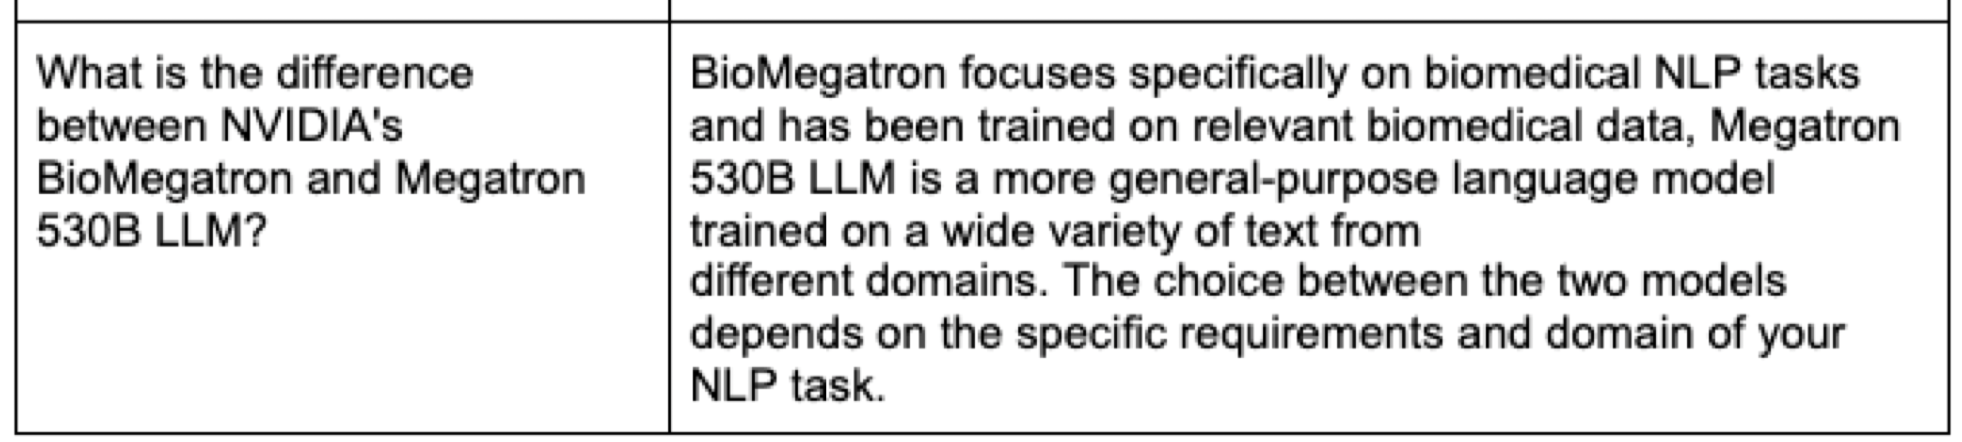

In [ ]:
from pprint import pprint
from langchain import LLMChain, PromptTemplate

question = "What is the difference between NVIDIA's BioMegatron and Megatron 530B LLM?"

template = """Question: {question}

Answer: Let's think step by step."""

prompt = PromptTemplate.from_template(template)

llm_chain = LLMChain(prompt=prompt, llm=llm)
pprint(llm_chain.invoke(question))

{'question': "What is the difference between NVIDIA's BioMegatron and Megatron "
             '530B LLM?',
 'text': '\n'
         '\n'
         "NVIDIA's BioMegatron is a language model that is trained on a "
         'dataset of 100 million human-generated sentences. It is designed to '
         'generate natural-sounding text that is consistent with the style and '
         'tone of the original text.\n'
         '\n'
         'Megatron 530B LLM is a language model that is trained on a dataset '
         'of 530 billion tokens, which is 530 times larger than the dataset '
         'used for BioMegatron. It is designed to generate text that is more '
         'accurate and precise than BioMegatron.\n'
         '\n'
         'The main difference between the two models is the size of the '
         'dataset they were trained on. BioMegatron was trained on a smaller '
         'dataset, while Megatron 530B LLM was trained on a much larger '
         'dataset. This means that Megatron 530

# Chat Pod:
I will be using Ollama to setup the chat pod. Please, follow the instruction on my LinkedIn article here (https://www.linkedin.com/pulse/ollama-langchain-local-gemma-applications-rany-elhousieny-phd%25E1%25B4%25AC%25E1%25B4%25AE%25E1%25B4%25B0-mlomc/) to setup the server before executing the following code.

In [95]:
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
from langchain_community.llms.ollama import Ollama
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Initialize the Ollama model
llm = Ollama(
    model="gemma:2b",
    
)

# Function to handle the input and display the response
def handle_query(sender):
    with output:
        clear_output(wait=True)  # Ensure the output is cleared only once ready to display new output
        print("Processing...")
        try:
            response = llm.invoke(input_box.value)
            display(HTML(f"<div style='word-wrap: break-word; white-space: pre-wrap;'>Response: {response}</div>"))
        except Exception as e:
            print("An error occurred:", str(e))

# Create widgets for input and output
input_box = widgets.Text(description="Enter a query:")
button = widgets.Button(description="Submit Query")
output = widgets.Output()

# Set up the button's event to handle the query
button.on_click(handle_query)

# Display the widgets
display(input_box, button, output)


Text(value='', description='Enter a query:')

Button(description='Submit Query', style=ButtonStyle())

Output()

# RAG process
1. Load Documents and Split Text into Chunks
2. Embedding
3. Vector DataBase and get Retriever
4. RAG Pipeline with LangChains

## 1. Load and Split text into Chunks

### 1.1 Load Documents
I will start with 4 URLs as a proof of concept of the full pipeline.
After that, I will load all the documents and compare performance

In [109]:
from langchain_community.document_loaders import WebBaseLoader

# List of URLs you want to load (We will crawl the entire site later)
urls = [
    "https://docs.nvidia.com",
    "https://docs.nvidia.com/cuda",
    "https://docs.nvidia.com/deeplearning",
    "https://docs.nvidia.com/gameworks"
    "https://docs.nvidia.com/cudnn",
    "https://docs.nvidia.com/tensorrt",
    
    
]

data = []

# Loop through each URL and load the page content
for url in urls:
    loader = WebBaseLoader(url)
    page = loader.load()
    page[0].page_content = page[0].page_content.replace('\n', '')
    data.extend(page)
    

pprint(data)
    


[Document(page_content="NVIDIA Documentation Hub - NVIDIA DocsSubmit SearchNVIDIA DeveloperBlogForumsJoinSubmit SearchNVIDIA DeveloperBlogForumsJoinMenuNVIDIA Documentation HubGet started by exploring the latest technical information and product documentationBrowse byFeaturedProductsAll DocumentsSubmit SearchMost PopularGet support for our latest innovations and see how you can bring them into your own work.NVIDIA CUDA        The NVIDIA® CUDA® Toolkit provides a comprehensive development environment for C and C++ developers building GPU-accelerated applications. With the CUDA Toolkit, you can develop, optimize, and deploy your applications on GPU-accelerated embedded systems, desktop workstations, enterprise data centers, cloud-based platforms and HPC supercomputers.                Browse            NVIDIA DGX Platform        Built from the ground up for enterprise AI, the NVIDIA DGX platform incorporates the best of NVIDIA software, infrastructure, and expertise in a modern, unified A

In [110]:
data

[Document(page_content="NVIDIA Documentation Hub - NVIDIA DocsSubmit SearchNVIDIA DeveloperBlogForumsJoinSubmit SearchNVIDIA DeveloperBlogForumsJoinMenuNVIDIA Documentation HubGet started by exploring the latest technical information and product documentationBrowse byFeaturedProductsAll DocumentsSubmit SearchMost PopularGet support for our latest innovations and see how you can bring them into your own work.NVIDIA CUDA        The NVIDIA® CUDA® Toolkit provides a comprehensive development environment for C and C++ developers building GPU-accelerated applications. With the CUDA Toolkit, you can develop, optimize, and deploy your applications on GPU-accelerated embedded systems, desktop workstations, enterprise data centers, cloud-based platforms and HPC supercomputers.                Browse            NVIDIA DGX Platform        Built from the ground up for enterprise AI, the NVIDIA DGX platform incorporates the best of NVIDIA software, infrastructure, and expertise in a modern, unified A

In [43]:
for doc in data:
    print(doc.metadata)

{'source': 'https://docs.nvidia.com', 'title': 'NVIDIA Documentation Hub - NVIDIA Docs', 'description': 'Get started by exploring the latest technical information and product documentation', 'language': 'en'}
{'source': 'https://docs.nvidia.com/cuda', 'title': 'CUDA Toolkit Documentation 12.4 Update 1', 'language': 'en'}
{'source': 'https://docs.nvidia.com/deeplearning', 'title': 'NVIDIA Documentation Hub - NVIDIA Docs', 'description': 'Get started by exploring the latest technical information and product documentation', 'language': 'en'}
{'source': 'https://docs.nvidia.com/gameworkshttps://docs.nvidia.com/cudnn', 'title': 'NVIDIA cuDNN - NVIDIA Docs', 'description': 'The NVIDIA CUDA® Deep Neural Network (cuDNN) is a GPU-accelerated library of primitives for deep neural networks. cuDNN provides highly tuned implementations for standard routines such as forward and backward convolution, attention, matmul, pooling, and normalization.', 'language': 'en'}
{'source': 'https://docs.nvidia.co

In [111]:
len(data)

5

In [46]:
from pprint import pprint
data[0].page_content = data[0].page_content.replace('\n', '')
pprint(data[0].page_content)

('NVIDIA Documentation Hub - NVIDIA DocsSubmit SearchNVIDIA '
 'DeveloperBlogForumsJoinSubmit SearchNVIDIA DeveloperBlogForumsJoinMenuNVIDIA '
 'Documentation HubGet started by exploring the latest technical information '
 'and product documentationBrowse byFeaturedProductsAll DocumentsSubmit '
 'SearchMost PopularGet support for our latest innovations and see how you can '
 'bring them into your own work.NVIDIA CUDA        The NVIDIA® CUDA® Toolkit '
 'provides a comprehensive development environment for C and C++ developers '
 'building GPU-accelerated applications. With the CUDA Toolkit, you can '
 'develop, optimize, and deploy your applications on GPU-accelerated embedded '
 'systems, desktop workstations, enterprise data centers, cloud-based '
 'platforms and HPC supercomputers.                Browse            NVIDIA '
 'DGX Platform        Built from the ground up for enterprise AI, the NVIDIA '
 'DGX platform incorporates the best of NVIDIA software, infrastructure, and '
 'ex

### 1.2 Split into Chunks

In [7]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

def split_docs(data):
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
    return text_splitter.split_documents(data)



In [ ]:
all_splits = split_docs(data)

In [113]:
print(all_splits)

[Document(page_content='NVIDIA Documentation Hub - NVIDIA DocsSubmit SearchNVIDIA DeveloperBlogForumsJoinSubmit SearchNVIDIA DeveloperBlogForumsJoinMenuNVIDIA Documentation HubGet started by exploring the latest technical information and product documentationBrowse byFeaturedProductsAll DocumentsSubmit SearchMost PopularGet support for our latest innovations and see how you can bring them into your own work.NVIDIA CUDA        The NVIDIA® CUDA® Toolkit provides a comprehensive development environment for C and C++ developers building GPU-accelerated applications. With the CUDA Toolkit, you can develop, optimize, and deploy your applications on GPU-accelerated embedded systems, desktop workstations, enterprise data centers, cloud-based platforms and HPC supercomputers.                Browse            NVIDIA DGX Platform        Built from the ground up for enterprise AI, the NVIDIA DGX platform incorporates the best of NVIDIA software, infrastructure, and expertise in a modern, unified A

In [114]:
len(all_splits)

106

## 2. Embedding

In [13]:
from langchain.embeddings import SentenceTransformerEmbeddings

embeddings = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

## 3.Setting up the  ChromaDB

In [77]:
!rm -rf ./docs/chromaDB  # remove old database files if any


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [25]:
# Add to ChromaDB vector store
from langchain_community.vectorstores import Chroma

def add_to_chroma(all_splits, embeddings, persist_directory):
    
    vectorstore = Chroma.from_documents(
    documents=all_splits,
    collection_name="rag-chroma",
    embedding=embeddings,
    persist_directory=persist_directory
    )
    # save the database so we can use it later
    vectorstore.persist()
    
    return vectorstore




In [ ]:
add_to_chroma(all_splits, embeddings, './docs/chromaDB/')



# check that the database have been created and get the number of documents
print(vectorstore._collection.count())

In [85]:
retriever = vectorstore.as_retriever()


In [86]:
question = "What is the NVIDIA CUDA Toolkit?"
docs = vectorstore.similarity_search(question)
len(docs)

4

In [87]:
for doc in docs:
    pprint(docs[0].page_content)
    print('***\n')


('attempting invalid usages of synchronization primitives. This document '
 'describes the usage of these tools.    ProductNVIDIA CUDA04/03/23        The '
 'NVIDIA® CUDA® Toolkit provides a comprehensive development environment for C '
 'and C++ developers building GPU-accelerated applications. With the CUDA '
 'Toolkit, you can develop, optimize, and deploy your applications on '
 'GPU-accelerated embedded systems, desktop workstations, enterprise data '
 'centers, cloud-based platforms and HPC supercomputers.')
***

('attempting invalid usages of synchronization primitives. This document '
 'describes the usage of these tools.    ProductNVIDIA CUDA04/03/23        The '
 'NVIDIA® CUDA® Toolkit provides a comprehensive development environment for C '
 'and C++ developers building GPU-accelerated applications. With the CUDA '
 'Toolkit, you can develop, optimize, and deploy your applications on '
 'GPU-accelerated embedded systems, desktop workstations, enterprise data '
 'centers, clo

## RAG Pipeline

The following template will restrict to only RAG to test the documents

In [133]:
from langchain_core.output_parsers import StrOutputParser
from langchain.prompts import ChatPromptTemplate
from langchain_community.chat_models import ChatOllama
from langchain_core.runnables import RunnableLambda, RunnablePassthrough

# Prompt
template = """Answer the question only from the following context:
{context}

Question: {question}

"""
prompt = ChatPromptTemplate.from_template(template)

# Local LLM
ollama_llm = "gemma:2b"
model_local = ChatOllama(model=ollama_llm)

# Retriever from the VectorDB
retriever = vectordb.as_retriever()





#### the RAG Pipeline


The following chain represents the RAG pipeline where data is seamlessly passed from one component to another, transforming it step by step:

Starting from extracting relevant context and passing the original question,
Formulating a well-structured prompt for model input,
Generating a response from the language model,
And finally parsing that response.
Each component is carefully linked using the pipe (|) operator, which in this context, denotes the flow of data through successive transformations, making the process streamlined and maintainable.








In [134]:
# Chain
chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | model_local
    | StrOutputParser()
)

The line of code above is using the RAG pipeline, where data is passed through a sequence of processing steps. Each component in the pipeline transforms the data in some way before passing it on to the next component. Let's break down each part:

1. **Chain Definition**:
   - `chain = (...)`: This sets up a variable named `chain` which is assigned the result of a series of operations connected by the pipe (`|`) operator. The pipe here serves as a way to pass the output of one function as the input to the next function.

2. **Components**:
   - `{"context": retriever, "question": RunnablePassthrough()}`: Here, I am creating a dictionary object with two keys. 
         `context` this is the context we get from the retriever object that is responsible for retrieving the context from the Vector DB accoring to the similarity with the question asked, and 
         `question` is set to an instance of `RunnablePassthrough()`. This `RunnablePassthrough` is  a class from LangChain_Core designed to pass through data without changing it,serving as a placeholder for the actual processing of the question. It is used here to pass the question through the pipeline without modifying it. This is useful when the question does not need processing or transformation before being used.
   
   - `prompt`: This refers to an instance of ChatPromptTemplate initialized with a predefined template. The purpose of this component in the chain is to take the dictionary (with context and question) and format it according to the template specified earlier. The formatted string will typically combine the retrieved context and the unmodified question into a structured prompt ready for the model.

   - `model_local`: This component is an instance of ChatOllama configured with a specific model identifier (ollama_llm). This step involves processing the formatted prompt from the previous step by feeding it to the local language model. The model will generate a response based on the input prompt, which incorporates both the context and the question.

   - `StrOutputParser()`: This final step in the chain uses the StrOutputParser class to parse the raw string output from the local language model. The parser is responsible for cleaning up the model's response, extracting specific parts of the output, or converting it into a more usable format.

In [135]:
# Question
chain.invoke("What is the NVIDIA CUDA Toolkit?")

'According to the context, the NVIDIA CUDA Toolkit is a comprehensive development environment for C and C++ developers building GPU-accelerated applications. It provides tools for developing, optimizing, and deploying applications on GPU-accelerated embedded systems, desktop workstations, enterprise data centers, cloud-based platforms and HPC supercomputers.'

# Evaluation


I will be using RAGAS as the scoring Framework with GPT3.5 as a Critic

## RAGAS Evaluation Metrics Function
Function to leverage RAGAs framework to calculate RAGAs metrics on generated answer against scenario store answer.
Context text is article text in the case of confluence document.
For Q&A formatted input datasets, we only use the ground truth answer as the context 

In [136]:
# Importing the required libraries
import json

from dotenv import load_dotenv
from datasets import Dataset
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    answer_correctness,
)
from ragas import evaluate
from langchain_openai.chat_models import AzureChatOpenAI
from langchain_openai.embeddings import AzureOpenAIEmbeddings
import math

load_dotenv()




True

In [137]:
def get_ragas_metrics(dataset: Dataset):
    """
    Function to leverage RAGAs framework to calculate RAGAs metrics on generated answer against scenario store answer.
    Context text is article text in the case of confluence document.
    For Q&A formatted input datasets, we only use the ground truth answer as the context 
    """

    with open("azure_keys.json", "r", encoding="utf-8") as f:
        azure_keys = json.loads(f.read())
        
        
    
    llm = AzureChatOpenAI(
        openai_api_version="2023-05-15",
        azure_endpoint=azure_keys["regions"][0]["Endpoint"],
        model="gpt-35-turbo",
        openai_api_key=azure_keys["regions"][0]["Key"],
    )

    

    embedding_model = AzureOpenAIEmbeddings(
        openai_api_version="2023-05-15",
        azure_endpoint=azure_keys["regions"][0]["Endpoint"],
        model='text-embedding-ada-002',
        openai_api_key=azure_keys["regions"][0]["Key"],
    )
    
    metrics = [
        faithfulness, 
        answer_relevancy, 
        answer_correctness]


    result = evaluate(
        dataset, 
        metrics=metrics, 
        llm=llm, 
        embeddings=embedding_model)
    
    
    json_result = {k: v if not math.isnan(v) else None for k, v in result.items()}

    return json_result, result

# Prepare RAGAS Test Dataset

In [160]:
from datasets import Dataset



questions = [
        "What is the CUDA Toolkit used for?",
        "What are some components included in the CUDA Toolkit?",
        "Can the CUDA Toolkit distribute computations across multiple GPUs?",
        "What is the purpose of the CUDA Programming Guide?",
        "What is the CUDA Best Practices Guide?",
        "How does the CUDA Compatibility Guide assist developers?",
        "What is the PTX ISA guide about?",
        "What is the role of the CUDA Math API?",
        "What does the CUDA Nsight Systems tool provide?"
    ]

ground_truths = [
        ["The CUDA Toolkit helps develop, optimize, and deploy GPU-accelerated applications across various platforms."],
        ["It includes GPU-accelerated libraries, debugging and optimization tools, a C/C++ compiler, and a runtime library."],
        ["Yes, it has built-in capabilities for distributing computations across multi-GPU configurations."],
        ["It provides detailed discussions of the CUDA programming model and interface, along with guidance on achieving maximum performance."],
        ["This guide presents established parallelization and optimization techniques for programming CUDA-capable GPU architectures."],
        ["It ensures that applications are compatible with various NVIDIA GPU architectures like Maxwell, Pascal, Volta, Turing, Ampere, and Ada."],
        ["It offers instructions on using PTX, a low-level parallel thread execution virtual machine and instruction set architecture."],
        ["The CUDA Math API provides various mathematical functions that can be used in GPU-accelerated applications."],
        ["Nsight Systems offers detailed performance metrics and API debugging for CUDA applications through a user interface and command line tool."]
    ]

answers = []
contexts = []

# Inference
for query in questions:
  answers.append(chain.invoke(query))
  contexts.append([docs.page_content for docs in retriever.get_relevant_documents(query)])

# To dict
data = {
    "question": questions,
    "answer": answers,
    "contexts": contexts,
    "ground_truths": ground_truths
}

dataset = Dataset.from_dict(data)


In [161]:
data

{'question': ['What is the CUDA Toolkit used for?',
  'What are some components included in the CUDA Toolkit?',
  'Can the CUDA Toolkit distribute computations across multiple GPUs?',
  'What is the purpose of the CUDA Programming Guide?',
  'What is the CUDA Best Practices Guide?',
  'How does the CUDA Compatibility Guide assist developers?',
  'What is the PTX ISA guide about?',
  'What is the role of the CUDA Math API?',
  'What does the CUDA Nsight Systems tool provide?'],
 'answer': ['The CUDA Toolkit is an extension to the x86-64 port of GDB, the GNU Project debugger. It provides detailed performance metrics and API debugging via a user interface and command line tool.',
  'The context does not specify what components are included in the CUDA Toolkit, so I cannot answer this question from the provided context.',
  'Yes, the CUDA Toolkit can distribute computations across multiple GPUs. It includes features for distributing computations across multi-GPU configurations, which allow

In [162]:
# Convert dict to dataset
dataset = Dataset.from_dict(data)

json_result, result = get_ragas_metrics(dataset)

passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`


Evaluating:   0%|          | 0/27 [00:00<?, ?it/s]

No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.


In [163]:
result

{'faithfulness': 1.0000, 'answer_relevancy': 0.5442, 'answer_correctness': 0.4452}

In [164]:
json_result

{'faithfulness': 1.0,
 'answer_relevancy': 0.5442241746504677,
 'answer_correctness': 0.44520842532669785}

# Improving Performance
As you can see from the results above, the answers relevancy is very low. I will add more documents 

## 1. Crawling and Parsing more documents from 
- https://docs.nvidia.com/nvidia-sitemap.xml
- https://www.nvidia.com/en-eu/en-eu.sitemap.xml
- https://developer.nvidia.com/sitemaps/en-us.sitemap.xml
- https://nvidianews.nvidia.com/sitemap.xml

The following code defines two functions for fetching and parsing the contents of a sitemap from a given URL. The `fetch_sitemap` function sends an HTTP GET request to the specified URL, checks for any errors in the request, and then returns the sitemap's XML content as text. The `parse_sitemap` function takes this XML content, parses it using Python's `xml.etree.ElementTree`, and extracts URLs. It handles both nested sitemaps and direct URLs within the sitemap. For nested sitemaps, it recursively fetches and parses each sitemap to gather all URLs. For direct URLs listed in the sitemap, it simply adds them to a list. The function ultimately returns a list of all URLs found, providing a comprehensive enumeration of all links contained within the sitemap and any nested sitemaps.

In [18]:
import requests
import xml.etree.ElementTree as ET

def fetch_sitemap(url):
    '''
    The `fetch_sitemap` function sends an HTTP GET request to the specified URL, 
    checks for any errors in the request, 
    and then returns the sitemap's XML content as text.
    '''
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad requests
    return response.text

def parse_sitemap(sitemap_content):
    # Parse the XML content of the sitemap
    root = ET.fromstring(sitemap_content)
    urls = []

    for sitemap in root.findall('{http://www.sitemaps.org/schemas/sitemap/0.9}sitemap'):
        loc = sitemap.find('{http://www.sitemaps.org/schemas/sitemap/0.9}loc')
        if loc is not None:
            urls.extend(parse_sitemap(fetch_sitemap(loc.text)))

    for url in root.findall('{http://www.sitemaps.org/schemas/sitemap/0.9}url'):
        loc = url.find('{http://www.sitemaps.org/schemas/sitemap/0.9}loc')
        if loc is not None:
            urls.append(loc.text)

    return urls




In [ ]:
# URL of the main sitemap
sitemap_url = "https://docs.nvidia.com/nvidia-sitemap.xml"

# Fetch and parse the sitemap
sitemap_content = fetch_sitemap(sitemap_url)
urls = parse_sitemap(sitemap_content)

# write the URL to a file
with open("nvidia_all_urls.txt", "w") as f:
    for url in urls:
        f.write(url + "\n")

In [7]:
# URL of the main sitemap
sitemap_url = "https://www.nvidia.com/en-eu/en-eu.sitemap.xml"

# Fetch and parse the sitemap
sitemap_content = fetch_sitemap(sitemap_url)
urls = parse_sitemap(sitemap_content)

# write the URL to a file
with open("www_nvidia_all_urls.txt", "w") as f:
    for url in urls:
        f.write(url + "\n")

In [19]:
# https://developer.nvidia.com/sitemaps/en-us.sitemap.xml

# URL of the main sitemap
sitemap_url = "https://developer.nvidia.com/sitemaps/en-us.sitemap.xml"

# Fetch and parse the sitemap
sitemap_content = fetch_sitemap(sitemap_url)
urls = parse_sitemap(sitemap_content)

# write the URL to a file
with open("dev_nvidia_all_urls.txt", "w") as f:
    for url in urls:
        f.write(url + "\n")

In [ ]:
# https://nvidianews.nvidia.com/sitemap.xml

# URL of the main sitemap
sitemap_url = "https://nvidianews.nvidia.com/sitemap.xml"

# Fetch and parse the sitemap
sitemap_content = fetch_sitemap(sitemap_url)
urls = parse_sitemap(sitemap_content)

# write the URL to a file
with open("news_nvidia_all_urls.txt", "w") as f:
    for url in urls:
        f.write(url + "\n")

### Go through the URLs and parse each URL into a DocumentLoader List

In [5]:
import json
import os
from langchain_community.document_loaders import WebBaseLoader


#### Helper Function to persist progress and continue where we stopped

In [20]:
# Load URLs from a text file with all the sub URLs to crawl
def load_urls_from_file(filename):
    """Load URLs from a text file, one URL per line."""
    with open(filename, 'r') as file:
        urls = file.readlines()
    return [url.strip() for url in urls]  # Remove any trailing whitespace or newline characters

# Scrap the URLs from the sitemap list of URLs
def process_urls(urls, start_index=0):
    """Process a list of URLs starting from a given index."""
    docs = []
    for i, url in enumerate(urls[start_index:], start=start_index):
        loader = WebBaseLoader(url)
        pages = loader.load()
        for page in pages:
            page.page_content = page.page_content.replace('\n', '')
            docs.append(page)
        save_progress(docs, i)  # Save after each URL to ensure recovery from the last processed point
    return docs

# Save processed documents and the last processed URL index
def save_progress(docs, last_url_index):
    """Save processed documents and the last processed URL index."""
    with open('dev_docs_progress.json', 'w') as doc_file:
        json.dump([doc.__dict__ for doc in docs], doc_file)
    with open('dev_progress_checkpoint.txt', 'w') as index_file:
        index_file.write(str(last_url_index))

# Define or import your Document class
class Document:
    def __init__(self, page_content, metadata=None):
        self.page_content = page_content
        self.metadata = metadata or {}

# Deserialize function
def deserialize_documents(json_data):
    return [Document(doc['page_content'], doc.get('metadata')) for doc in json_data]

# Load progress with deserialization
def load_progress():
    """Load processed documents and the last processed URL index."""
    try:
        with open('dev_docs_progress.json', 'r') as doc_file:
            json_data = json.load(doc_file)
        documents = deserialize_documents(json_data)
        with open('dev_progress_checkpoint.txt', 'r') as index_file:
            last_url_index = int(index_file.read())
        return documents, last_url_index
    except FileNotFoundError:
        return [], -1  # Default to empty and -1 if files not found


In [29]:
# Load URLs from file
nvidia_urls = load_urls_from_file("nvidia_all_urls.txt")

# Try loading progress
nvidia_docs, last_processed_index = load_progress()

# Display current progress
print(f"Loaded progress: {last_processed_index} URLs processed out of {len(nvidia_urls)} total URLs.")


Loaded progress: 2656 URLs processed out of 46346 total URLs.


In [9]:
# Load URLs from file
nvidia_urls = load_urls_from_file("www_nvidia_all_urls.txt")

# Try loading progress
nvidia_docs, last_processed_index = load_progress()

# Display current progress
print(f"Loaded progress: {last_processed_index} URLs processed out of {len(nvidia_urls)} total URLs.")


Loaded progress: -1 URLs processed out of 1447 total URLs.


In [21]:
# Load URLs from file
nvidia_urls = load_urls_from_file("dev_nvidia_all_urls.txt")

# Try loading progress
nvidia_docs, last_processed_index = load_progress()

# Display current progress
print(f"Loaded progress: {last_processed_index} URLs processed out of {len(nvidia_urls)} total URLs.")


Loaded progress: -1 URLs processed out of 4252 total URLs.


In [30]:
len(nvidia_docs)

2500

#### Process the documents from the list

In [ ]:
# Determine start index based on whether progress was loaded
start_index = last_processed_index + 1 if last_processed_index != -1 else 0

# Resume or start processing
if start_index < len(nvidia_urls):  # Check if there's more to process
    nvidia_docs.extend(process_urls(nvidia_urls, start_index))
    print(f"Processed {len(nvidia_docs)} documents from {len(nvidia_urls)} URLs.")
else:
    print("All URLs have already been processed.")


In [126]:
nvidia_docs

[Document(page_content="NVIDIA Documentation Hub - NVIDIA DocsSubmit SearchNVIDIA DeveloperBlogForumsJoinSubmit SearchNVIDIA DeveloperBlogForumsJoinMenuNVIDIA Documentation HubGet started by exploring the latest technical information and product documentationBrowse byFeaturedProductsAll DocumentsSubmit SearchMost PopularGet support for our latest innovations and see how you can bring them into your own work.NVIDIA CUDA        The NVIDIA® CUDA® Toolkit provides a comprehensive development environment for C and C++ developers building GPU-accelerated applications. With the CUDA Toolkit, you can develop, optimize, and deploy your applications on GPU-accelerated embedded systems, desktop workstations, enterprise data centers, cloud-based platforms and HPC supercomputers.                Browse            NVIDIA DGX Platform        Built from the ground up for enterprise AI, the NVIDIA DGX platform incorporates the best of NVIDIA software, infrastructure, and expertise in a modern, unified A

In [10]:
nvidia_docs[0]


{'page_content': 'HTTP Status 500 – Internal Server ErrorHTTP Status 500 – Internal Server Error',
 'metadata': {'source': 'https://docs.nvidia.com/isaac/archive/2021.1/packages/missions/doc/missions.html',
  'title': 'HTTP Status 500 – Internal Server Error',
  'language': 'en'},
 'type': 'Document'}

In [22]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Load documents
nvidia_docs, _ = load_progress()

# Initialize text splitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=0)

# Split documents
split_documents = text_splitter.split_documents(nvidia_docs)


In [150]:
def process_url(url):
    
    loader = WebBaseLoader(url)
    pages = loader.load()
        
    return pages

In [151]:
nvidia_docs = process_url("https://docs.nvidia.com/cuda/")

In [152]:
len(nvidia_docs)

1

In [154]:
pprint(nvidia_docs[0].metadata)

{'language': 'en',
 'source': 'https://docs.nvidia.com/cuda/',
 'title': 'CUDA Toolkit Documentation 12.4 Update 1'}


In [157]:
# find https://docs.nvidia.com/cudnn/index.html in the docs
for doc in nvidia_docs:
        print(doc.metadata)

{'source': 'https://docs.nvidia.com/cuda/', 'title': 'CUDA Toolkit Documentation 12.4 Update 1', 'language': 'en'}


In [155]:
# Split documents
split_documents = text_splitter.split_documents(nvidia_docs)

In [158]:
# find https://docs.nvidia.com/cudnn/index.html in the docs
for doc in split_documents:
        print(doc.metadata)

{'source': 'https://docs.nvidia.com/cuda/', 'title': 'CUDA Toolkit Documentation 12.4 Update 1', 'language': 'en'}
{'source': 'https://docs.nvidia.com/cuda/', 'title': 'CUDA Toolkit Documentation 12.4 Update 1', 'language': 'en'}
{'source': 'https://docs.nvidia.com/cuda/', 'title': 'CUDA Toolkit Documentation 12.4 Update 1', 'language': 'en'}
{'source': 'https://docs.nvidia.com/cuda/', 'title': 'CUDA Toolkit Documentation 12.4 Update 1', 'language': 'en'}
{'source': 'https://docs.nvidia.com/cuda/', 'title': 'CUDA Toolkit Documentation 12.4 Update 1', 'language': 'en'}
{'source': 'https://docs.nvidia.com/cuda/', 'title': 'CUDA Toolkit Documentation 12.4 Update 1', 'language': 'en'}
{'source': 'https://docs.nvidia.com/cuda/', 'title': 'CUDA Toolkit Documentation 12.4 Update 1', 'language': 'en'}
{'source': 'https://docs.nvidia.com/cuda/', 'title': 'CUDA Toolkit Documentation 12.4 Update 1', 'language': 'en'}
{'source': 'https://docs.nvidia.com/cuda/', 'title': 'CUDA Toolkit Documentation

In [159]:
# Add documents to the vectorstore
vectordb.add_documents(split_documents)

['31b94f21-bc6e-44b0-8cbd-3cbfea5b82b5',
 'f823f515-5ee4-4b90-a142-5e95f57a8212',
 '45bcb26a-d08a-49f4-932d-d3e09bca7639',
 '7a622e46-c544-44a9-ad4c-64ac1124f09b',
 '5747da97-6063-4727-8743-bef734bcfbf7',
 '9a197554-060f-4d3c-b401-d4620d475553',
 'c21d6cb3-0be5-43e4-8fbe-1e89a7612886',
 'aaafdb90-d828-49ae-b7b8-d4f078506048',
 '760d793c-8779-46c0-b92b-90bcbde3865b',
 '0ff700c6-50f3-4aa6-ae07-f6dc8006a744',
 'd6cdfc2c-dd34-4f6c-b0ed-99bc957a06c7',
 'e7820fe6-8ff2-4f8b-9255-7cdf2bb2835a',
 'a7866c9f-83c6-40be-bdeb-3690644576ac',
 '05a04fec-6b86-4f69-bf2c-997fe0acbb6e',
 '18371d6c-0713-4637-a18a-0b9294b6b336',
 'cac9f364-dca8-422f-abba-437bd4eee2e3',
 '17b1feb0-e361-4513-9317-52b519681cc2',
 '7084bb79-942b-4677-85e8-dcca5704f2b3',
 '6f43174c-5198-4b46-ac9b-dea92e7614b2',
 'ff7efc80-ece6-4851-bbcc-c7b3bd66fc26',
 '66f5a84c-70f6-4fcd-8922-09a6eb5fb917']

In [9]:
# print 10 nvidia documents
for doc in split_documents[:10]:
    print(doc.metadata)

{'source': 'https://www.nvidia.com/en-eu/about-nvidia/i-am-ai/', 'title': 'Artificial Intelligence at NVIDIA: I AM AI | NVIDIA', 'description': 'From speech recognition and recommender systems to medical imaging, AI is powering change in every industry.', 'language': 'en-eu'}
{'source': 'https://www.nvidia.com/en-eu/about-nvidia/i-am-ai/', 'title': 'Artificial Intelligence at NVIDIA: I AM AI | NVIDIA', 'description': 'From speech recognition and recommender systems to medical imaging, AI is powering change in every industry.', 'language': 'en-eu'}
{'source': 'https://www.nvidia.com/en-eu/about-nvidia/i-am-ai/', 'title': 'Artificial Intelligence at NVIDIA: I AM AI | NVIDIA', 'description': 'From speech recognition and recommender systems to medical imaging, AI is powering change in every industry.', 'language': 'en-eu'}
{'source': 'https://www.nvidia.com/en-eu/about-nvidia/i-am-ai/', 'title': 'Artificial Intelligence at NVIDIA: I AM AI | NVIDIA', 'description': 'From speech recognition 

In [10]:
len(split_documents)

32306

In [22]:
# print the first 10 documents
for doc in split_documents[:10]:
    print(doc.metadata)

{'source': 'https://docs.nvidia.com/isaac/archive/2021.1/packages/missions/doc/missions.html', 'title': 'HTTP Status 500 – Internal Server Error', 'language': 'en'}
{'source': 'https://docs.nvidia.com/isaac/archive/2021.1/doc/isaac_rc/index.html', 'title': 'HTTP Status 500 – Internal Server Error', 'language': 'en'}
{'source': 'https://docs.nvidia.com/isaac/archive/2021.1/bazel-sdk/packages/navigation/doc/semantic_areas.html', 'title': 'HTTP Status 500 – Internal Server Error', 'language': 'en'}
{'source': 'https://docs.nvidia.com/isaac/archive/2021.1/doc/setup.html', 'title': 'HTTP Status 500 – Internal Server Error', 'language': 'en'}
{'source': 'https://docs.nvidia.com/isaac/archive/2021.1/packages/object_pose_estimation/doc/dope.html', 'title': 'HTTP Status 500 – Internal Server Error', 'language': 'en'}
{'source': 'https://docs.nvidia.com/isaac/archive/2021.1/bazel-sdk/packages/composite/doc/composite_messages.html', 'title': 'HTTP Status 500 – Internal Server Error', 'language': 

In [27]:
vectorstore2 = add_to_chroma(split_documents, embeddings, './docs/chromaDB2/')

In [37]:

def process_url_range(filename, start_index, end_index, existing_docs):
    """Process a range of URLs from the file and append the results to the existing documents."""
    urls = load_urls_from_file(filename)
    
    # Validate indices
    if start_index < 0 or end_index > len(urls) or start_index > end_index:
        raise ValueError("Invalid start or end index")
    
    # Slice the list of URLs for the specified range
    selected_urls = urls[start_index:end_index+1]  # +1 because end_index should be inclusive
    
    # Process each URL in the range
    for url in selected_urls:
        loader = WebBaseLoader(url)
        pages = loader.load()
        for page in pages:
            page.page_content = page.page_content.replace('\n', '')
            existing_docs.append(page)
    return existing_docs


old = []
additional_docs = process_url_range("nvidia_all_urls.txt", 0, 32, old)

In [38]:
for doc in additional_docs:
    print(doc.metadata)

{'source': 'https://docs.nvidia.com/', 'title': 'NVIDIA Documentation Hub - NVIDIA Docs', 'description': 'Get started by exploring the latest technical information and product documentation', 'language': 'en'}
{'source': 'https://docs.nvidia.com/login', 'title': 'Login - NVIDIA Docs', 'language': 'en'}
{'source': 'https://docs.nvidia.com/riva/index.html', 'title': 'NVIDIA Riva - NVIDIA Docs', 'description': '<a  href="https://developer.nvidia.com/riva" target="_blank" link-data="{&quot;cms.site.owner&quot;:{&quot;_ref&quot;:&quot;00000183-b424-d282-a3b3-ffff9e630000&quot;,&quot;_type&quot;:&quot;ae3387cc-b875-31b7-b82d-63fd8d758c20&quot;},&quot;cms.content.publishDate&quot;:1673637443990,&quot;cms.content.publishUser&quot;:{&quot;_ref&quot;:&quot;00000184-1a8b-d6da-a186-1f9bfec90000&quot;,&quot;_type&quot;:&quot;6aa69ae1-35be-30dc-87e9-410da9e1cdcc&quot;},&quot;cms.content.updateDate&quot;:1673637443990,&quot;cms.content.updateUser&quot;:{&quot;_ref&quot;:&quot;00000184-1a8b-d6da-a186-

In [39]:
# Split documents
split_documents = text_splitter.split_documents(additional_docs)

In [14]:
from langchain_community.vectorstores import Chroma

vectordb = Chroma(
    persist_directory='./docs/chromaDB2/', 
    collection_name="rag-chroma",
    embedding_function=embeddings)

In [15]:
# Add documents to the vectorstore
vectordb.add_documents(split_documents)

['c0aed916-ed38-4957-a143-2007e9be506b',
 '35090c08-3bff-4bb3-b0b5-27c84f87af48',
 'd455bf4f-44d4-45df-af52-c2a5a5f75a4e',
 'a68e1262-2a46-44ea-a390-168091c9a157',
 '14132e21-556c-40f4-a01b-3897067f9910',
 '9078518e-fbaf-418e-97f6-3294b49f0f0d',
 '0a45385b-84e0-4542-9f3d-248d0108bd42',
 '83994c4d-4d1a-404e-bc85-2617c9573a73',
 '6fb785c2-1e28-44f6-954c-63a583704fb8',
 'fbf99ebf-987e-4fa1-8546-c509daa6617c',
 '34b83572-d359-46bf-90d3-cc9a9fd4db64',
 '9c7e2c7e-3a5d-4f30-8d3a-ee0cce5019da',
 '73805586-c278-4260-a970-bc5223398e0a',
 '36fbc8ca-59c2-4414-b682-bb5e16ebbdea',
 '0ea93968-3f31-40ce-a0f6-90859c2ee20d',
 '720e8c2f-e379-4607-99de-d72313d2ca81',
 '279099cb-11ba-48c6-b7e2-5cb32e711ca8',
 '5c4f79a8-16b4-4fe0-bd32-50052e678011',
 '14b882a1-0f7d-4157-869c-ba3bd4a2fa1c',
 '1769e20f-f6ec-4058-a96a-32cf213a1f3c',
 '658cd3dc-22d8-4d73-889d-2d355dba9fa5',
 '67577b61-0138-4a44-b742-bbfe177d4859',
 '80b45996-03d2-42f1-9203-e492376901c3',
 'ace18b66-baeb-4b0d-b716-212e89c82cff',
 'c9bd7295-9de1-

In [41]:
print(vectorstore2._collection.count())

32877


In [45]:
question = "What is NVidia CUDA Toolkit?"
docs = vectorstore2.similarity_search(question)
len(docs)


4

In [47]:
# print metadata
for doc in docs:
    print(doc.metadata['source'])

https://docs.nvidia.com/
https://docs.nvidia.com/cuda/doc/index.html
https://docs.nvidia.com/deeplearning/frameworks/tensorflow-wheel-release-notes/tf-wheel-rel.html
https://docs.nvidia.com/nsight-developer-tools/index.html


In [49]:
from pprint import pprint

for doc in docs:
    pprint(doc.page_content)

('NVIDIA Documentation Hub - NVIDIA DocsSubmit SearchNVIDIA '
 'DeveloperBlogForumsJoinSubmit SearchNVIDIA DeveloperBlogForumsJoinMenuNVIDIA '
 'Documentation HubGet started by exploring the latest technical information '
 'and product documentationBrowse byFeaturedProductsAll DocumentsSubmit '
 'SearchMost PopularGet support for our latest innovations and see how you can '
 'bring them into your own work.NVIDIA CUDA        The NVIDIA® CUDA® Toolkit '
 'provides a comprehensive development environment for C and C++ developers '
 'building GPU-accelerated applications. With the CUDA Toolkit, you can '
 'develop, optimize, and deploy your applications on GPU-accelerated embedded '
 'systems, desktop workstations, enterprise data centers, cloud-based '
 'platforms and HPC supercomputers.                Browse            NVIDIA '
 'DGX Platform        Built from the ground up for enterprise AI, the NVIDIA '
 'DGX platform incorporates the best of NVIDIA software, infrastructure, and '
 'ex

In [50]:
vectorstore2._collection.count()

32877

In [16]:
vectordb._collection.count()

65183

In [24]:
vectordb.persist()

https://www.nvidia.com/en-us/research/publications/2021/BioMEGATRON-Genome-Biology-Natural-Language-Understanding/


## USING A Bigger Model Latest Llama 3

In [25]:
!ollama pull llama3


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest 
pulling 00e1317cbf74...   0% ▕                ▏    0 B/4.7 GB                  pulling manifest 
pulling 00e1317cbf74...   0% ▕                ▏    0 B/4.7 GB                  pulling manifest 
pulling 00e1317cbf74...   0% ▕                ▏    0 B/4.7 GB                  pulling manifest 
pulling 00e1317cbf74...   

In [26]:
!ollama list

NAME                    	ID          	SIZE  	MODIFIED       
gemma:2b                	b50d6c999e59	1.7 GB	5 days ago    	
llama3:latest           	a6990ed6be41	4.7 GB	11 seconds ago	
mxbai-embed-large:latest	468836162de7	669 MB	2 days ago    	
zephyr:latest           	bbe38b81adec	4.1 GB	2 days ago    	


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


I tried Llama3 but it was very slow, so I decided to go back to Gemma2B